In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
file_path = '/content/drive/MyDrive/Data/datasetpenyakit.csv'

In [18]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load dataset
# file_path = 'path_to_your_dataset.csv'  # Ganti dengan path dataset Anda
dataset = pd.read_csv(file_path)


In [19]:
# Mengganti spasi dengan underscore pada nama kolom
dataset.columns = dataset.columns.str.replace(' ', '')

# Simpan dataset yang telah diperbaiki
dataset.to_csv('/content/drive/MyDrive/Data/datasetpenyakit_fixed.csv', index=False)

print("Nama kolom setelah diperbaiki:")
print(dataset.columns)

Nama kolom setelah diperbaiki:
Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)


In [20]:
# Pisahkan fitur dan target
X = dataset.drop(columns=["prognosis"])
y = dataset["prognosis"]

# One-hot encode target
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y)

# Mendapatkan nama kelas
disease_classes = encoder.categories_[0]
print("Disease Classes:", disease_classes)


Disease Classes: ['AIDS' 'Acne' 'Alcoholic Hepatitis' 'Allergy' 'Arthritis'
 'Bronchial Asthma' 'Cervical Spondylosis' 'Chickenpox'
 'Chronic Cholestasis' 'Common Cold' 'Dengue' 'Diabetes '
 'Dimorphic Hemmorhoids (piles)' 'Drug Reaction' 'Fungal Infection' 'GERD'
 'Gastroenteritis' 'Heart Attack' 'Hepatitis A' 'Hepatitis B'
 'Hepatitis C' 'Hepatitis D' 'Hepatitis E' 'Hypertension '
 'Hyperthyroidism' 'Hypoglycemia' 'Hypothyroidism' 'Impetigo' 'Jaundice'
 'Malaria' 'Migraine' 'Osteoarthritis' 'Paralysis (brain hemorrhage)'
 'Peptic Ulcer Disease' 'Pneumonia' 'Psoriasis' 'Tuberculosis' 'Typhoid'
 'Urinary Tract Infection' 'Varicose Veins' 'Vertigo']


In [21]:
# Define model
model = Sequential([
    Dense(128, input_shape=(132,), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(41, activation='softmax')  # Output layer
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    verbose=1)

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Epoch 1/50
100/100 [==============================] - 1s 4ms/step - loss: 2.9083 - accuracy: 0.4445 - val_loss: 1.3760 - val_accuracy: 0.9736
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 0.7924 - accuracy: 0.9216 - val_loss: 0.1198 - val_accuracy: 1.0000
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 0.2048 - accuracy: 0.9761 - val_loss: 0.0240 - val_accuracy: 1.0000
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1074 - accuracy: 0.9877 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0672 - accuracy: 0.9953 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 6/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9953 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0330 - accuracy: 0.9975 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 

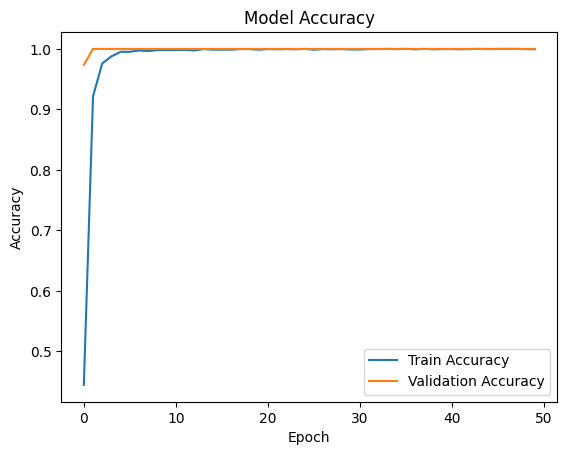

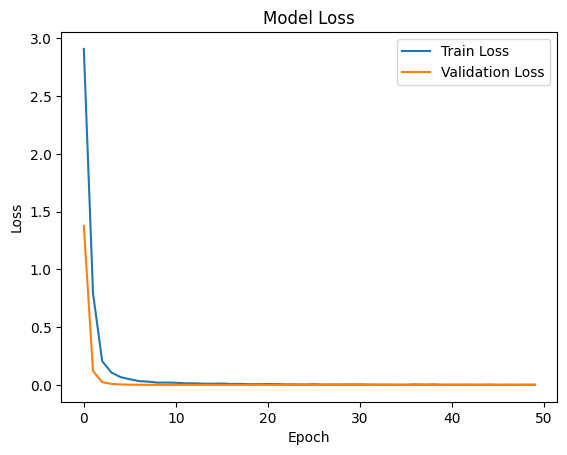

In [22]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [23]:
# Contoh input untuk prediksi
input_features = ['itching', 'skin_rash', 'nodal_skin_eruptions', 'dischromic_patches']
X_sample = [1 if feature in input_features else 0 for feature in X.columns]

# Prediksi
X_sample = pd.DataFrame([X_sample])  # Ubah ke DataFrame
prediction = model.predict(X_sample)

# Tampilkan hasil
predicted_class = disease_classes[prediction.argmax()]
print("Predicted Disease:", predicted_class)


1/1 [==============================] - 0s 53ms/step
Predicted Disease: Fungal Infection


# TES

In [24]:
# Ambil semua kolom kecuali kolom target
features = [col for col in dataset.columns if col != 'prognosis']
print("Daftar fitur (tanpa kolom target):", features)

Daftar fitur (tanpa kolom target): ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', '

In [25]:
penyakit = dataset['prognosis'].unique()
print(penyakit)

['Fungal Infection' 'Allergy' 'GERD' 'Chronic Cholestasis' 'Drug Reaction'
 'Peptic Ulcer Disease' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical Spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chickenpox' 'Dengue'
 'Typhoid' 'Hepatitis A' 'Hepatitis B' 'Hepatitis C' 'Hepatitis D'
 'Hepatitis E' 'Alcoholic Hepatitis' 'Tuberculosis' 'Common Cold'
 'Pneumonia' 'Dimorphic Hemmorhoids (piles)' 'Heart Attack'
 'Varicose Veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthritis' 'Arthritis' 'Vertigo' 'Acne' 'Urinary Tract Infection'
 'Psoriasis' 'Impetigo']


In [26]:
from IPython.display import display
import ipywidgets as widgets
import numpy as np
import pandas as pd

# Mendapatkan daftar fitur dan nama penyakit
features = X.columns  # X adalah DataFrame fitur dari dataset
penyakit = disease_classes  # Nama kelas penyakit dari OneHotEncoder

# Fungsi untuk memproses input menjadi array dengan panjang sesuai jumlah fitur
def process_input(input_features, all_features):
    """
    Memproses input gejala menjadi array 2D untuk prediksi.
    Gejala yang tidak diinput diberi nilai 0.
    """
    processed_input = [1 if feature in input_features else 0 for feature in all_features]
    return np.array([processed_input])  # Menambahkan dimensi batch

# Text Area untuk Input Gejala
text_area = widgets.Textarea(
    placeholder='Masukkan nama gejala, dipisahkan dengan koma, misal: feature1,feature2',
    description='Gejala:',
    layout=widgets.Layout(width='100%')
)

# Tombol Prediksi
button = widgets.Button(description='Prediksi')

# Output Area
output = widgets.Output()

# Fungsi untuk Menangani Klik Tombol
def on_button_click(b):
    with output:
        output.clear_output()  # Hapus output sebelumnya
        input_text = text_area.value.strip()
        input_features = [f.strip() for f in input_text.split(',') if f.strip()]
        print("Gejala yang dimasukkan:", input_features)

        # Proses input menjadi array (otomatis panjang 131, dengan nilai 0 untuk yang tidak diinput)
        X_test = process_input(input_features, features)
        print("Array Input Gejala:", X_test)

        # Lakukan prediksi
        prediction = model.predict(X_test)  # Menggunakan model DNN
        print("Hasil Prediksi Probabilitas:", prediction)

        # Menampilkan hasil prediksi
        predicted_index = np.argmax(prediction)  # Indeks kelas dengan probabilitas tertinggi
        predicted_disease = penyakit[predicted_index]  # Nama penyakit berdasarkan indeks

        # Tampilkan hasil
        print("Hasil Prediksi:", predicted_disease)

button.on_click(on_button_click)

# Tampilkan Form dan Output
display(text_area, button, output)


Textarea(value='', description='Gejala:', layout=Layout(width='100%'), placeholder='Masukkan nama gejala, dipi…

Button(description='Prediksi', style=ButtonStyle())

Output()

In [27]:
export_dir = './saved_model'

tf.saved_model.save(model, export_dir)

In [28]:
# EXERCISE: Use the TFLiteConverter SavedModel API to initialize the converter
# UNQ_C5
# GRADED CODE: save_model

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations = [tf.lite.Optimize.DEFAULT]

In [29]:
# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [31]:
import pathlib
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

30944